# 📌 ACTIVIDAD 5: REGRESIÓN A PARTIR DE FOTOGRAFÍAS.

## DEFINIR PROBLEMA Y RECOPILAR DATOS

Crea el notebook saa_u03_p01_a5-<tus_iniciales>.ipynb donde entregar esta actividad. Necesitamos
consensuar por votación 2 posibles problemas (lo que escoja la mayoría de la clase gana) más que
nada por obtener suficiente cantidad de datos de alguno de los problemas:

 a) Predecir la edad de una persona: Si nadie está en contra de aportar fotografías personales,
cada alumno buscará 10 fotografías suyas o de conocidos (propias, familia, amigos, …)
realizadas en diferentes edades y las etiquetará con la edad que tenía en ese momento la
persona que aparece "edad_<tus_iniciales>-<num_foto>.jpg" o "edad_<tus_iniciales>
<num_foto>.png". En el caso de descargar de Internet las imágenes o de generarlas con
aplicaciones tened cuidado porque al buscar os pueden aparecer las mismas fotografías para
diferentes edades. La cara debe cubrir casi toda la foto (sin paisaje de fondo: ajustar el borde de
abajo a la barbilla y los laterales a las orejas y el borde superior al pelo) y la persona debe estar
mirando de frente.

 b) Predecir la peligrosidad de un animal en un rango de 0 a 10: 10 significa que te puede
matar o desgraciar si te engancha y 0 que no te va a dañar (al menos en principio). En caso de
escoger esta opción cada uno buscará, procesará y aportará 10 fotografías de cabezas de
animales de todo tipo (serpientes, insectos, felinos, osos, tiburones, ovejas, gatitos, …) con el
nombre del fichero siguiendo el formato "peligo_<tus_iniciales>-<num_foto>.jpg" o bien
formato "peligo_<tus_iniciales>-<num_foto>.png".


Nota: este enfoque no tiene visos de dar buenos resultados. Lo ideal sería extraer característics de cada
fotografía (zonas de ojos, boca, nariz, orejas, dientes) creando embeddings y codificando estos rasgos a
través de deep learning y luego usarlos para realizar las predicciones, pero vamos a probar a ver que tal
nos va, al fin y al cabo es una excusa para probar regresores.

 Una vez que tengas las fotografías debes procesarlas. Te paso el siguiente código:



In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import re

# Ruta a la carpeta de imágenes
carpeta_imagenes = "../U03_Recursos/U03_P01_Regresiones/edad/"
archivo_salida = "samartlop_imagenes.csv"

# Aceptar .jpg, .jpeg o .png que comienzan con dígitos (como "10_jororo-1.png")
patron = r"^\d+.*\.(jpe?g|png)$"

datos_procesados = []

for nombre_archivo in os.listdir(carpeta_imagenes):
    if not re.match(patron, nombre_archivo, re.IGNORECASE):
        continue

    ruta_completa = os.path.join(carpeta_imagenes, nombre_archivo)

    try:
        edad = int(nombre_archivo.split("_")[0])  # Extrae '10' de '10_jororo-1.png'
    except ValueError:
        print(f"❌ No se pudo extraer la edad de: {nombre_archivo}")
        continue

    imagen = cv2.imread(ruta_completa, cv2.IMREAD_GRAYSCALE)
    if imagen is None:
        print(f"❌ No se pudo leer la imagen: {nombre_archivo}")
        continue

    imagen_escalada = cv2.resize(imagen, (92, 112), interpolation=cv2.INTER_AREA)
    imagen_normalizada = (imagen_escalada / 255.0).astype(np.float32)
    datos_procesados.append({
        "edad": edad,
        "imagen": imagen_normalizada
    })

# Verificar si se procesaron imágenes
if not datos_procesados:
    print("⚠️ No se procesaron imágenes. Revisa la carpeta y el patrón de nombres.")
    exit()

# Guardar en CSV
df = pd.DataFrame({
    "edad": [d["edad"] for d in datos_procesados],
    "imagen": [",".join(map(str, d["imagen"].ravel())) for d in datos_procesados]
})
df.to_csv(archivo_salida, index=False)
print(f"✅ Se guardaron {len(df)} imágenes procesadas en '{archivo_salida}'")

✅ Se guardaron 31 imágenes procesadas en 'samartlop_imagenes.csv'


 Lo que hace el código es definir rutas (que debes adaptar para tu uso) en las variables carpeta (ruta
relativa para alcanzar el lugar donde están las imágenes) y archivo_salida (pathname relativo que
define el archivo .csv donde se van a guardar los datos).

 Las imágenes de carpeta se transforman usando la librería opencv (quizás debas instalarla) en
información numérica de la siguiente manera: obtendremos una imagen en escala de grises de
dimensiones 92x112 píxels (ancho x alto) que se almacenan como valores float de 32 bits sin signo
entre 0 y 256 normalizados a float en el intervalo [0,1]. La columna target de cada foto será la primera
característica del dataset. Por ejemplo podemos tener ficheros como estos:


 Y al ejecutar el script obtenermos el resultado y generamos:


 Y un fichero .csv donde anotamos los datos de cada ejemplo, algo como esto:


Debes subir tus fotografías debidamente etiquetadas a la siguiente carpeta: 📂 carpeta . Pero antes
comprueba que son correctos y de paso realizas la carga de datos. Para ello prueba a cargar tus
imágenes en un DataFrame de pandas y mostrar sus datos y visualizar alguna de las imágenes que
contiene. El siguiente ejemplo visualiza la primera fotografía usando opencv y aunque sale en su
propia ventana nos sirve para comprobar que las hemos generado y cargado bien:

In [2]:
# Leer el CSV y convertir las imágenes
df = pd.read_csv(archivo_salida)

if df.empty:
    print("⚠️ El archivo CSV está vacío.")
    exit()

df["imagen"] = df["imagen"].apply(lambda x: np.array(list(map(float, x.split(',')))).reshape(112, 92))

# Mostrar la primera imagen
edad = df.iloc[0]["edad"]
imagen = df.iloc[0]["imagen"]
pixel_array = (imagen * 255).astype(np.uint8)

print(f"🖼️ Edad: {edad}, Imagen shape: {imagen.shape}")
cv2.imshow(f"Edad: {edad}", pixel_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

🖼️ Edad: 10, Imagen shape: (112, 92)


Este otro código define un método al que indicas (un array de imágenes, un array con sus etiquetas y
desde que imagen hasta qué imagen quieres visualizar). El método usa matplotlib para visualizarlas
añadiendo etiquetas con el dato (la edad en este ejemplo) en un recuadro rojo en la esquina superior
izquierda) y con el índice que ocupa en el DataFrame (una caja de color verde en la esquina inferior
izquierda).

Y aquí está ese otro código:


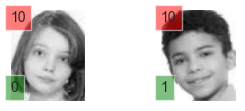

In [3]:
import matplotlib.pyplot as plt

def print_imagenes(imgs, targets, desde, hasta):
    # configuramos el tamaño de las imágenes por pulgadas
    fig = plt.figure(figsize=(30, 24))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(desde, hasta):
        # graficamos las imágenes en una matriz de 25x20
        p = fig.add_subplot(25, 20, i + 1, xticks=[], yticks=[])
        p.imshow(imgs[i], cmap="gray")
        # etiquetar imágenes con target e índice
        p.text(0, 14, str(targets[i]), bbox=dict(facecolor='red', alpha=0.5))
        p.text(0, 100, str(i), bbox=dict(facecolor='green', alpha=0.5))
    plt.show()

print_imagenes(df.iloc[:]["imagen"], df.iloc[:]["edad"], 0, 2)

### ENTRENAR VARIOS REGRESORES Y MEDIR SU DESEMPEÑO


Ahora vamos a utilizar varios regresores para ver el desempeño que somos capaces de conseguir en
esta tarea. Debes probar todos los regresores que importamos en esta figura:

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

 En primer lugar necesitamos transformar la característica imagen de cada cara en una característica
por cada pixel, para ello:

In [5]:
# Preparar características del dataframe
y = df['edad']
df_pixels = df["imagen"].apply(lambda img: img.flatten()) # Aplana cada imagen
df_pixels = pd.DataFrame(df_pixels.tolist()) # Expandir en columnas
df_final = pd.concat([df['edad'], df_pixels], axis=1) # Unir con la edad
X = df_final.drop(columns=["edad"]) # Características (píxeles)

Como es algo que haremos en todos los modelos, voy a pasarte el código de un método que nos
ahorrará trabajo. Solo tenemos que pasar en cada llamada los valores y_train, y_test,
y_train_predicho, y_test_predicho y el nombre del modelo. Los valores reales y las predicciones
deben pasarse sin escalar para que se entiendan bien los gráficos. La figura se obtiene con SVR y solo
31 fotos originales:


In [6]:
def resumen_resultado(y_train, y_train_predicho, y_test, y_test_predicho, nombre_modelo="modelo"):
    rmse_train = mean_squared_error(y_train, y_train_predicho)**0.5
    rmse_test = mean_squared_error(y_test, y_test_predicho)**0.5
    print(f"RMSE en train de ({nombre_modelo}): {rmse_train:.6f}")
    print(f"RMSE en test de ({nombre_modelo}): {rmse_test:.6f}")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_test, color="red", label="Valor real")
    plt.scatter(y_test, y_test_predicho, color="blue", label="Valor predicho")
    plt.xlabel("edad")
    plt.ylabel("edad predicha")
    plt.axvline()
    plt.axhline()
    plt.title(f"Valor-predicción en Test ({nombre_modelo})")
    plt.legend()

    plt.subplot(1, 2, 2)
    bar_width = 0.35
    bars1 = plt.bar(2 - bar_width/2, rmse_train, width=bar_width, label="RMSE Train", color="royalblue")
    bars2 = plt.bar(2 + bar_width/2, rmse_test, width=bar_width, label="RMSE Test", color="tomato")

    # Anotar valores encima de las barras
    for bars in [bars1, bars2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

    plt.ylabel("RMSE")
    plt.title("RMSE en train y test")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

 ### ENTREGA 9:

a) Añade a la carpeta compartida tus 10 fotografías con el formato indicado.

 b) Adapta el código propuesto, lo entregas y lo ejecutas.

 c) Entrenas y pruebas el modelo
SVR.

 d) Entrenas y pruebas el modelo
DecisionTreeRegressor.

 e) Entrenas y pruebas el modelo
KneighborsRegressor.

 f) Entrenas y pruebas el modelo
BaggingRegressor.

 g) Entrenas y pruebas el modelo
RandomForestRegressor.

 h) Entrenas y pruebas el modelo
AdaBoostRegressor.

 i)  Entrenas y pruebas el modelo
 GradientBoostingRegressor.
 underfitting

 j) Comenta en cada uno de ellos los ajustes de hiperparámetros que has intentado para evitar
que tengan
o bien
overfitting
 . Si no consigues solucionarlo deja la mejor
configuración

In [8]:
import os
import re
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ruta a tus imágenes
carpeta_animales = r"C:\Users\ESP\Desktop\MachineLearning\saa\U3_AprendizajeSupervisado2\U03_Recursos\animals\img"

# Procesar imágenes
regex = re.compile(r".*\.(jpg|jpeg|png)$", re.IGNORECASE)
datos = []

for nombre in os.listdir(carpeta_animales):
    if not regex.match(nombre):
        continue
    try:
        edad = int(re.findall(r"-(\d+)\.", nombre)[0]) + 20  # edad ficticia: número + 20
    except (ValueError, IndexError):
        print(f"❌ No se pudo extraer edad de {nombre}")
        continue

    ruta = os.path.join(carpeta_animales, nombre)
    img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ No se pudo leer imagen {nombre}")
        continue
    img = cv2.resize(img, (92, 112))
    img = (img / 255.0).astype(np.float32)
    datos.append({"edad": edad, "imagen": img.ravel()})

if len(datos) == 0:
    raise ValueError("⚠️ No se procesaron imágenes. Verifica la ruta y los nombres.")

# Crear DataFrame
df = pd.DataFrame(datos)
X = np.stack(df["imagen"].values)
y = df["edad"].values

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=675)

❌ No se pudo extraer edad de 0_davroctau_Mono1.jpg
❌ No se pudo extraer edad de 10_davroctau_Dinosaurio2.jpg
❌ No se pudo extraer edad de 1_davroctau_Dinosaurio1.jpg
❌ No se pudo extraer edad de 1_davroctau_Periquito.jpg
❌ No se pudo extraer edad de 3_davroctau_Caballo1.jpg
❌ No se pudo extraer edad de 3_davroctau_Caballo2.jpg
❌ No se pudo extraer edad de 3_davroctau_Gato1.jpg
❌ No se pudo extraer edad de 4_davroctau_Perro.jpg
❌ No se pudo extraer edad de 5_davroctau_Mono2.jpg
❌ No se pudo extraer edad de 7_davroctau_Cocodrilo.jpg
❌ No se pudo extraer edad de 9_cobra.png
❌ No se pudo extraer edad de 9_tynki__Winki.png


RMSE en train de (SVR): 17.406752
RMSE en test de (SVR): 6074.480202


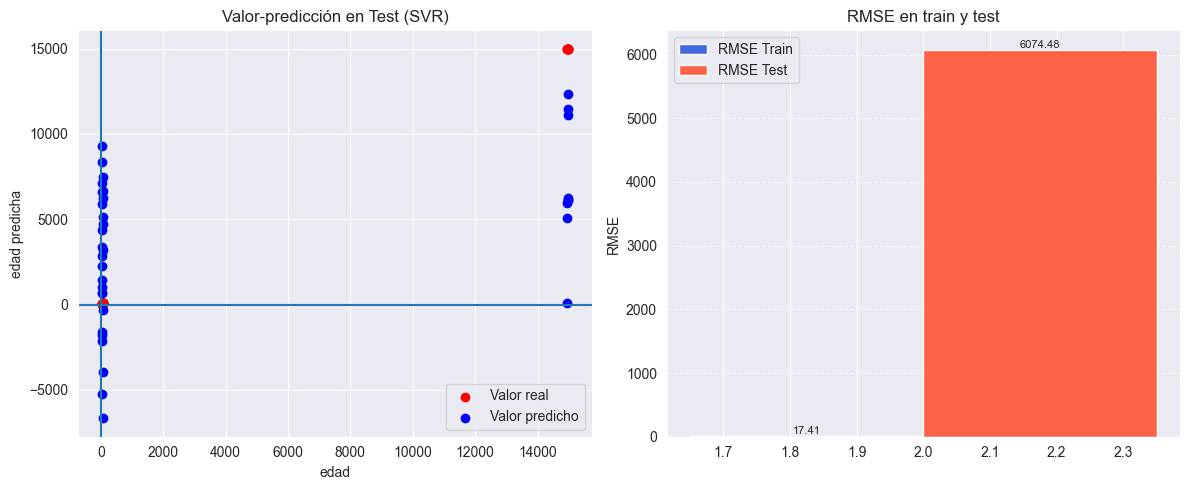

In [9]:
modelo_svr = SVR(C=10, epsilon=0.2, kernel='linear')
modelo_svr.fit(X_train, y_train)
resumen_resultado(y_train, modelo_svr.predict(X_train), y_test, modelo_svr.predict(X_test), "SVR")


RMSE en train de (Decision Tree): 1749.614480
RMSE en test de (Decision Tree): 7970.121537


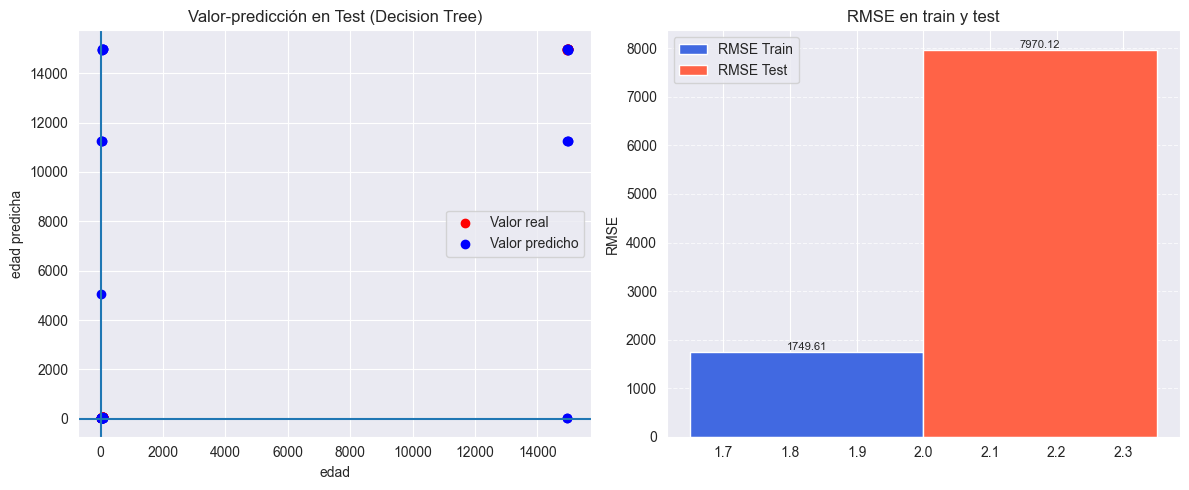

In [10]:
modelo_dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=449)
modelo_dt.fit(X_train, y_train)
resumen_resultado(y_train, modelo_dt.predict(X_train), y_test, modelo_dt.predict(X_test), "Decision Tree")


RMSE en train de (KNN): 4648.273438
RMSE en test de (KNN): 6295.293834


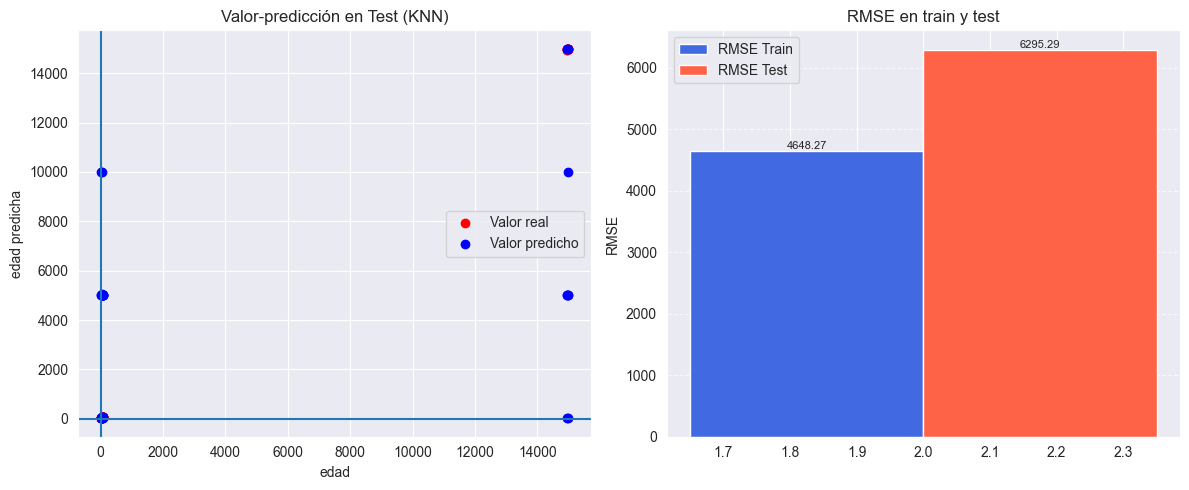

In [11]:
modelo_knn = KNeighborsRegressor(n_neighbors=3)
modelo_knn.fit(X_train, y_train)
resumen_resultado(y_train, modelo_knn.predict(X_train), y_test, modelo_knn.predict(X_test), "KNN")


RMSE en train de (Bagging): 2279.435330
RMSE en test de (Bagging): 6139.236134


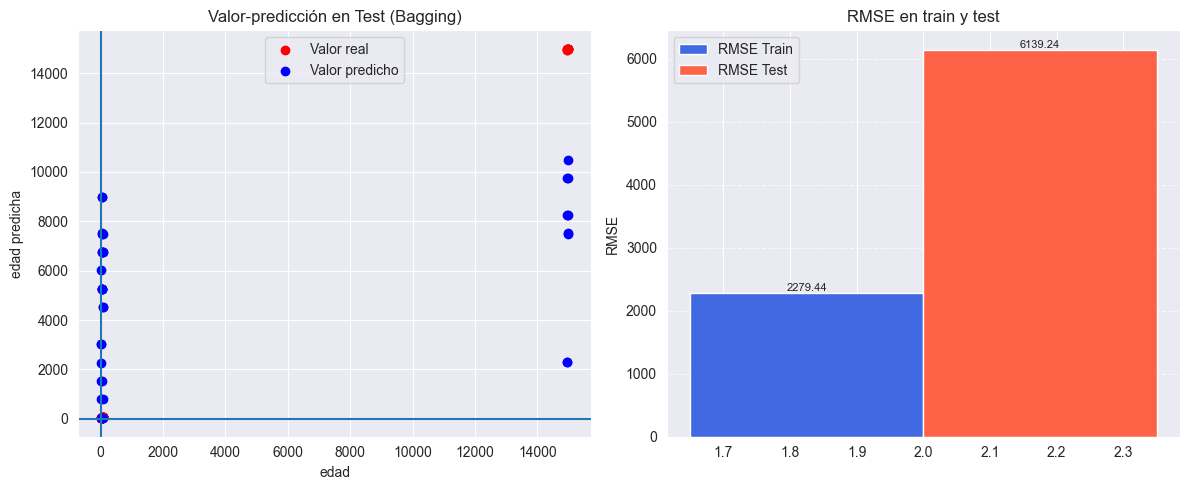

In [12]:
modelo_bagging = BaggingRegressor(n_estimators=20, random_state=449)
modelo_bagging.fit(X_train, y_train)
resumen_resultado(y_train, modelo_bagging.predict(X_train), y_test, modelo_bagging.predict(X_test), "Bagging")


RMSE en train de (Random Forest): 2088.702034
RMSE en test de (Random Forest): 5707.029583


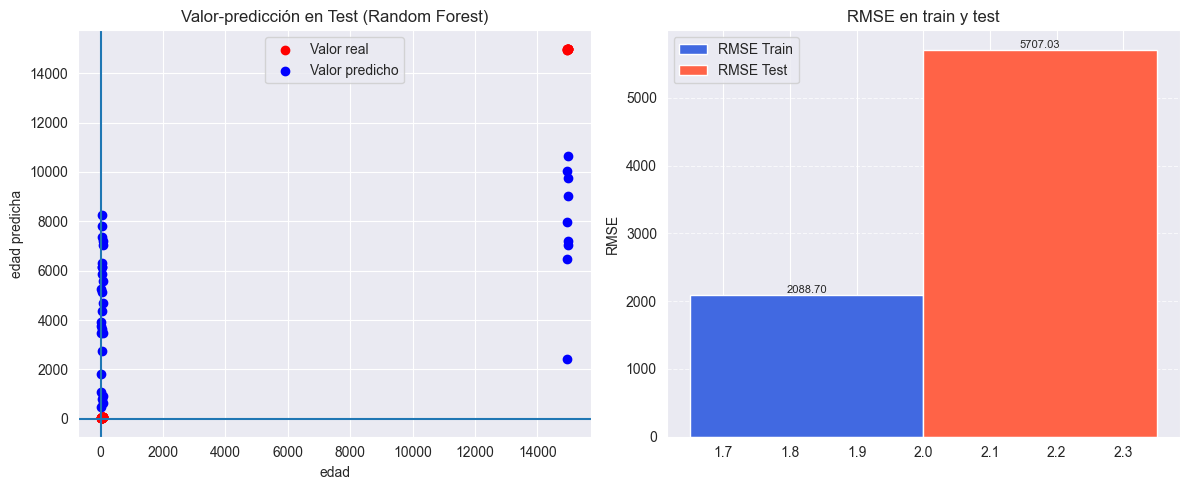

In [13]:
modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=449)
modelo_rf.fit(X_train, y_train)
resumen_resultado(y_train, modelo_rf.predict(X_train), y_test, modelo_rf.predict(X_test), "Random Forest")


RMSE en train de (AdaBoost): 15.530242
RMSE en test de (AdaBoost): 6177.778034


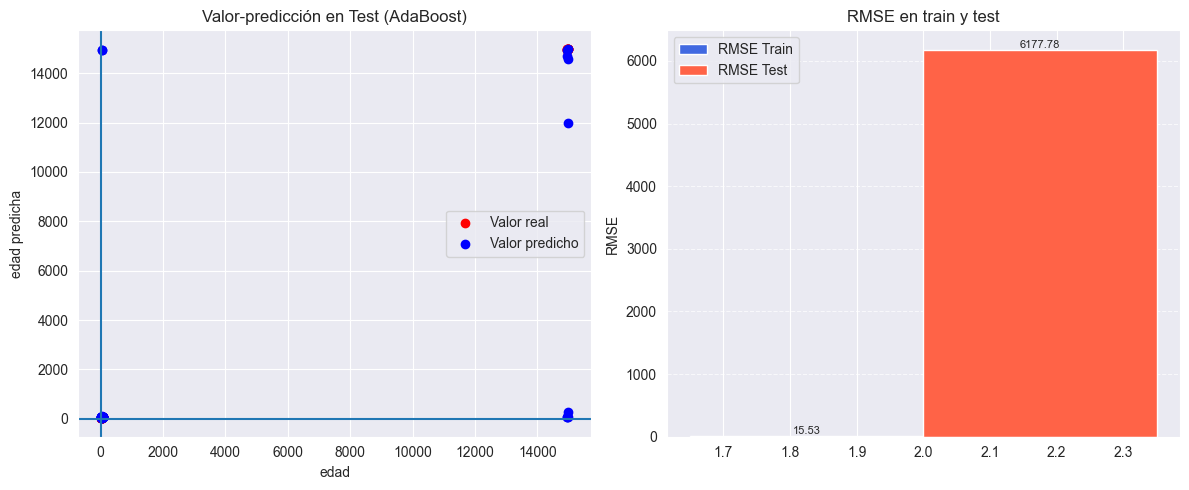

In [14]:
modelo_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.8, random_state=449)
modelo_adaboost.fit(X_train, y_train)
resumen_resultado(y_train, modelo_adaboost.predict(X_train), y_test, modelo_adaboost.predict(X_test), "AdaBoost")


RMSE en train de (Gradient Boosting): 5.771187
RMSE en test de (Gradient Boosting): 6375.669969


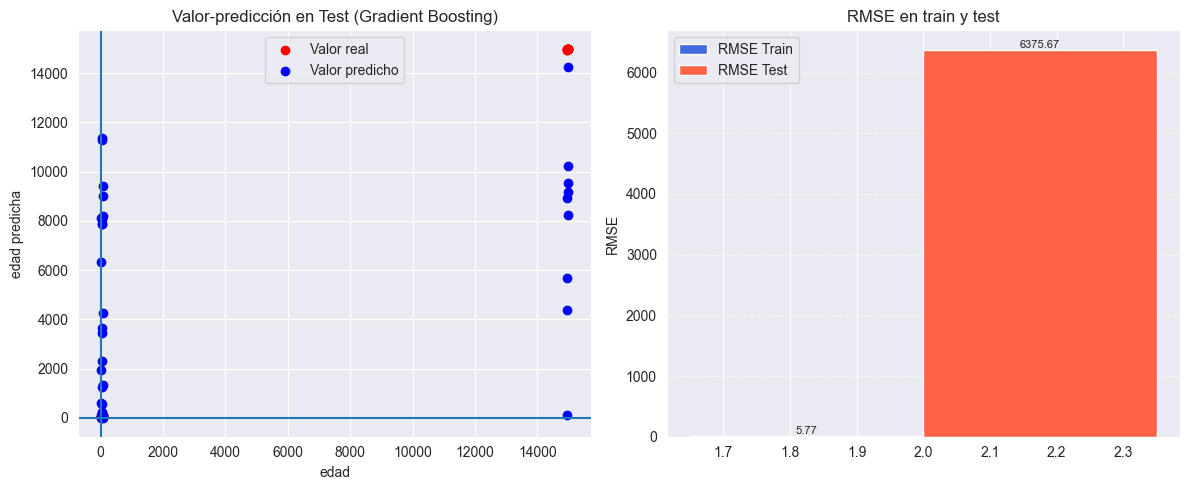

In [15]:
modelo_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=449)
modelo_gb.fit(X_train, y_train)
resumen_resultado(y_train, modelo_gb.predict(X_train), y_test, modelo_gb.predict(X_test), "Gradient Boosting")
